In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\MachineLearning\4\352f1626-6710-4ac7-b1c7-4f4b6ee3cf68230721-0609481\train.csv')
df.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9,گُل
1,m_17,p_16,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,55,4,مهار توسط دروازه بان
2,m_111,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,86,31,مهار توسط دروازه بان
3,m_142,p_87,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,77,2,موقعیت از دست رفته
4,m_117,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46,گُل


In [5]:
df.shape
#تعداد سطرها و ستونها

(8925, 12)

In [7]:
len(set(df.playerId))

160

In [12]:
len(df['playerId'].unique())

160

In [13]:
df['playerId'].nunique()

160

In [14]:
df_goal = df[df['outcome'] == 'گُل']
df_goal.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9,گُل
4,m_117,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46,گُل
23,m_140,p_143,جریان بازی,سر,7.23,4.99,1,0,کم,88,20,گُل
30,m_110,p_104,جریان بازی,پای چپ,9.23,4.99,2,0,کم,36,25,گُل
31,m_59,p_139,جریان بازی,پای راست,12.72,4.74,3,0,متوسط,50,8,گُل


In [8]:
d = {}
for p in df_goal.playerId:
    d.setdefault(p,0)
    d[p] = d[p] + 1


In [9]:
m = max(d.values())
for k,v in d.items():
    if v == m:
        print(k)

p_18


In [10]:
p_goal = df_goal['playerId'].value_counts()
p_goal.index[0]

'p_18'

In [11]:
p_goal.idxmax()

'p_18'

In [12]:
p_goal.idxmin()

'p_141'

In [13]:
p_goal[p_goal.idxmin()]

2

In [14]:
p_goal[p_goal.idxmax()]

16

In [20]:
p_goal.index.max()

'p_99'

In [21]:
p_shoot = df['playerId'].value_counts()

In [22]:
rate = p_goal/p_shoot
rate

p_1      0.149254
p_10     0.129630
p_100    0.102041
p_101    0.195652
p_102    0.180328
           ...   
p_95     0.078431
p_96     0.116279
p_97     0.138462
p_98     0.092593
p_99     0.064516
Name: playerId, Length: 160, dtype: float64

In [23]:
rate.idxmax()

'p_18'

In [24]:
rate[rate.idxmax()]

0.25396825396825395

In [25]:
rate.idxmin()

'p_147'

In [26]:
rate[rate.idxmin()]

0.028985507246376812

In [27]:
df['distance'] = np.sqrt(df['x']**2 + df['y']**2)

In [49]:
df = df[['matchId', 'playerId', 'playType', 'bodyPart', 'x', 'y', 'distance',
       'interveningOpponents', 'interveningTeammates', 'interferenceOnShooter',
       'minute', 'second', 'outcome']]
df.head()

,matchId,playerId,playType,bodyPart,x,y,distance,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,جریان بازی,پای راست,13.47,-11.22,17.530810,1,0,متوسط,70,9,گُل
1,m_17,p_16,جریان بازی,پای چپ,9.48,14.22,17.090313,3,0,متوسط,55,4,مهار توسط دروازه بان
2,m_111,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,29.456534,6,2,کم,86,31,مهار توسط دروازه بان
3,m_142,p_87,جریان بازی,پای راست,26.93,1.00,26.948560,4,1,متوسط,77,2,موقعیت از دست رفته
4,m_117,p_9,جریان بازی,پای راست,10.72,5.24,11.932141,2,0,متوسط,76,46,گُل


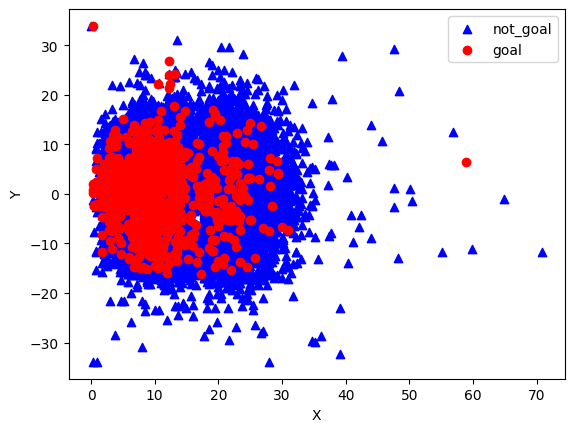

In [30]:
not_goal = df[df['outcome'] != 'گُل']
goal = df[df['outcome'] == 'گُل']
plt.scatter(not_goal.x,not_goal.y,label = 'not_goal' , color = 'blue', marker='^')
plt.scatter(goal.x,goal.y,label = 'goal', color = 'red', marker='o'  )
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

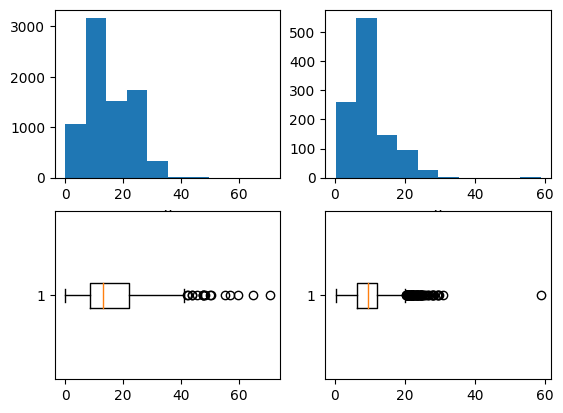

In [56]:
plt.subplot(221)
plt.hist(not_goal.x)
plt.xlabel('x')
plt.subplot(222)
plt.hist(goal.x)
plt.xlabel('x')
plt.subplot(223)
plt.boxplot(not_goal.x, vert= False)
plt.subplot(224)
plt.boxplot(goal.x, vert= False)
plt.show()